In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
df = pd.read_csv("heart.csv")
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train a Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)

# Evaluate Decision Tree
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9853658536585366
Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [2]:
# 2. Pruned Decision Tree (limit depth to avoid overfitting)
dtree_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree_pruned.fit(X_train, y_train)
y_pred_pruned = dtree_pruned.predict(X_test)
print("Pruned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))

Pruned Decision Tree Accuracy: 0.8


In [3]:
# 3. Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9853658536585366


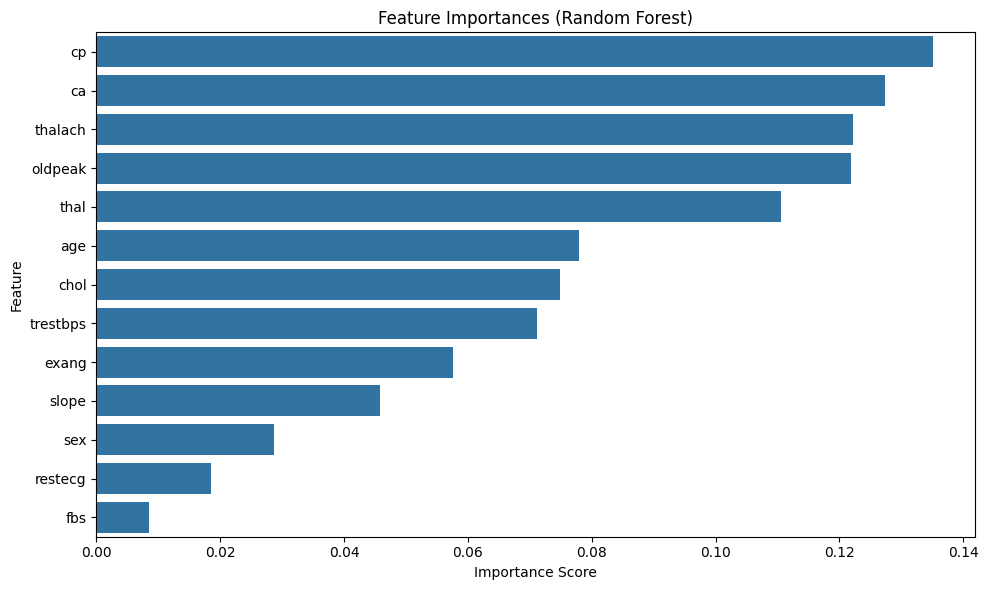

In [5]:
# 4. Feature Importances from Random Forest
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [6]:
# 5. Evaluate using cross-validation
cv_scores_dt = cross_val_score(dtree, X, y, cv=5)
cv_scores_rf = cross_val_score(rf, X, y, cv=5)
print("CV Accuracy (Decision Tree):", cv_scores_dt.mean())
print("CV Accuracy (Random Forest):", cv_scores_rf.mean())

CV Accuracy (Decision Tree): 1.0
CV Accuracy (Random Forest): 0.9970731707317073
